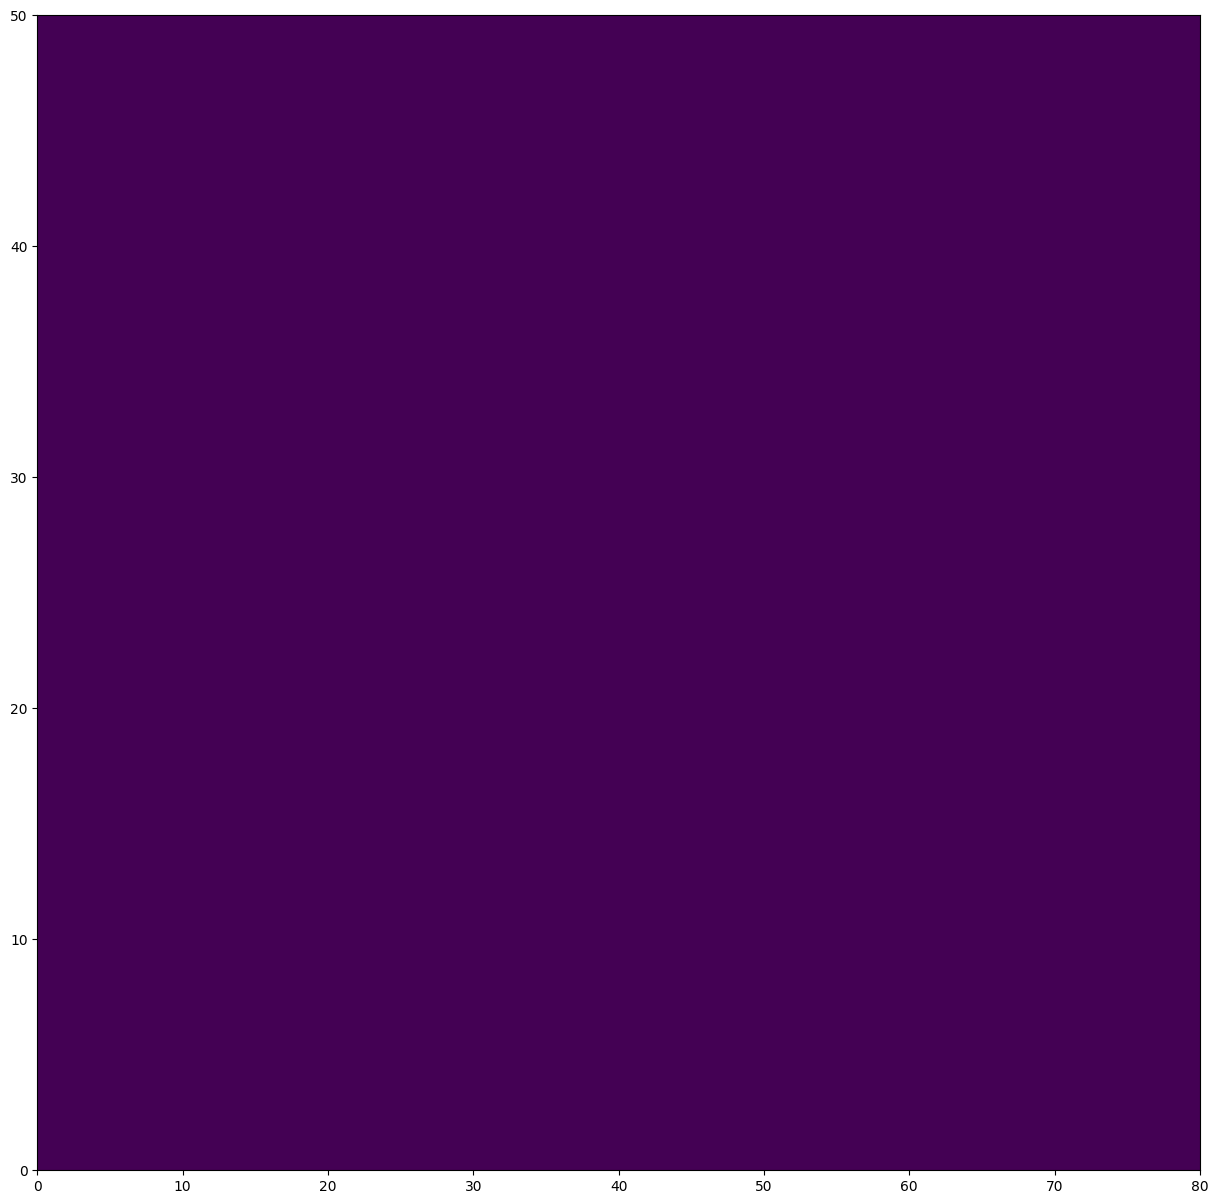

Residual:  0.8393252090500682 Mass Residual: -0.001117500828989274 Mass: -301.76738096162404  Continuity:  6503.732567346824  at  100 th iteration   Time:  1.7431708000000015
Residual:  0.4497985803793701 Mass Residual: -0.0004229221128048988 Mass: -282.1198187225567  Continuity:  5348.8440828732355  at  200 th iteration   Time:  3.1876915999999937
Residual:  0.302698734795509 Mass Residual: -0.00023992730046305978 Mass: -273.35225229854916  Continuity:  4842.624705143312  at  300 th iteration   Time:  4.62074659999999
Residual:  0.23325690545441916 Mass Residual: -0.00016148764917841137 Mass: -268.05352798166746  Continuity:  4538.316672491868  at  400 th iteration   Time:  6.035338699999983
Residual:  0.18826674633604681 Mass Residual: -0.00011959276999535096 Mass: -264.36788539855786  Continuity:  4327.163056027299  at  500 th iteration   Time:  7.486424199999988
Residual:  0.15458139139665603 Mass Residual: -9.373672041684872e-05 Mass: -261.5897802770868  Continuity:  4168.29573993

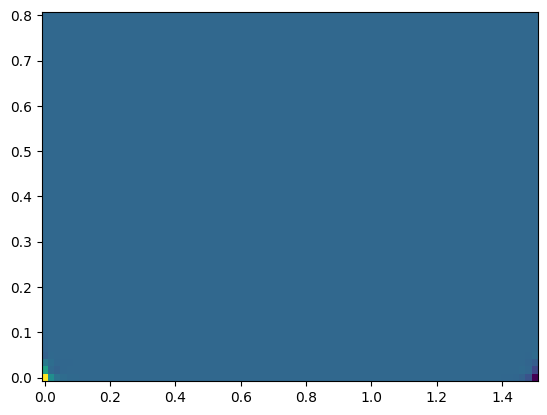

In [1]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map


# block_coordinates = [(0,0),(0,5),(5,5),(5,0)]
block_coordinates = [(0,0),(0,0.8),(1.5,0.8),(1.5,0)]

# print(list(block_coordinates[3]))
node_numbers = [80, 50]

space = Mesh(block_coordinates, node_numbers) #it seems like a one block. Build more sopisticated block type structures
# space.nonuniform_block_mesh_2D(-1.2, -1.4)
# space.nonuniform_mesh_2D(-1.2, -1.4)

#|----------------------------------------------
a, b = space.nonuniform_block_mesh_2D(1, 1)
circle = object()
rectangle = object()
# circle.circle(0.15, (0.4,0.4))
property_map = Map(space)
rectangle.rectang(0.9, 0.2, (0.65,0.4))
# property_map.create_object(circle)
property_map.create_object(rectangle)
# rectangle.rectang(1.0, 0.05, (0.5,0.1))
# property_map.create_object(rectangle)
property_map.show()
#|-----------------------------------------------

# property_map.show()
# circle.circle(0.4, (3.4,2.4))
# space.create_object(circle)
# circle.circle(0.4, (2.4,1.4))
# space.create_object(circle)
#


BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'D'}
BCs_values = {'W': 1, 'S': 0, 'E': 0.1, 'N': 0.4}


solution = PDE_2D_Solver(space,BCs)
solution.solver(BCs_values, "potensial", property_map, 1.4, 1e-7, itteration_type="nodebynode")

# solution.countour()

# compt_dom = Mesh(block_coordinates, node_numbers)
# compt_dom.uniform_block_mesh_2D()

# compt_dom.plot2D()
# space.plot2D()
# compt_dom.Jacobi(a, b)
# print(compt_dom.Jacobian)

# print(OneDcentraldiff(compt_dom.matricies[0], a))
# print(OneDcentraldiff(compt_dom.matricies[0], b, axis=1))
# print(OneDcentraldiff(compt_dom.matricies[1], a))
# print(OneDcentraldiff(compt_dom.matricies[1], -b, axis=1))
# compt_dom.matricies[1] 




In [ ]:
solution.velocityfield("stream")
solution.plot2D("stream")
solution.stream()
solution.quiver()

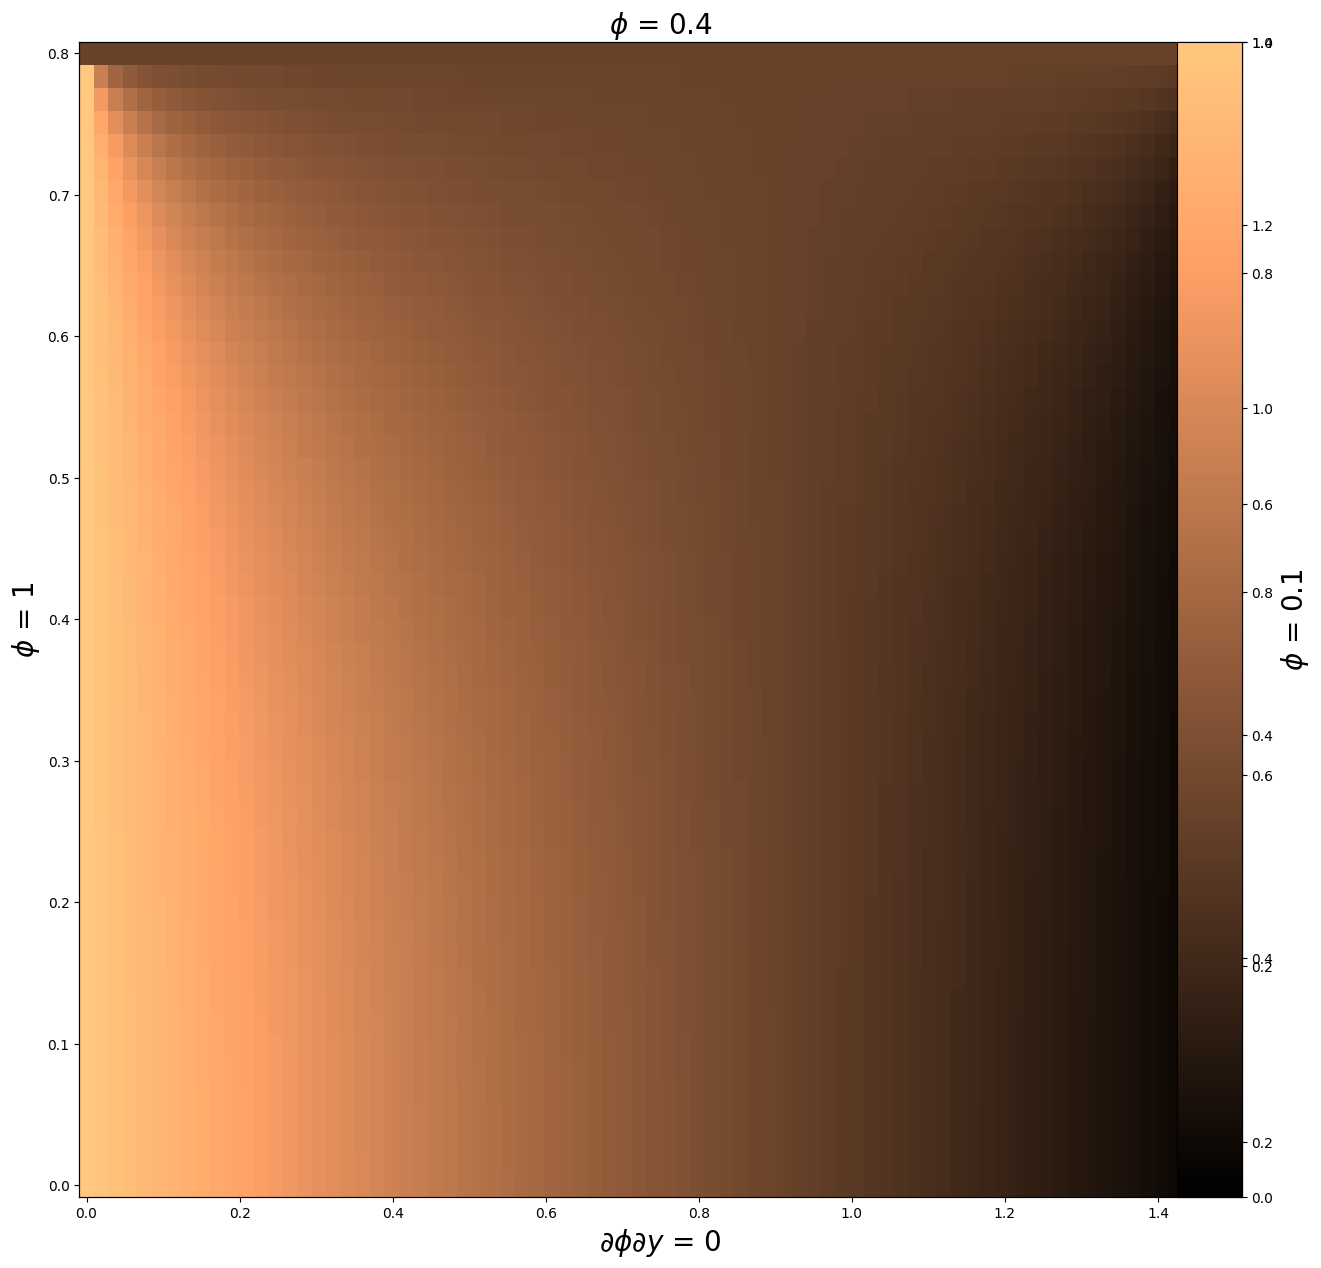

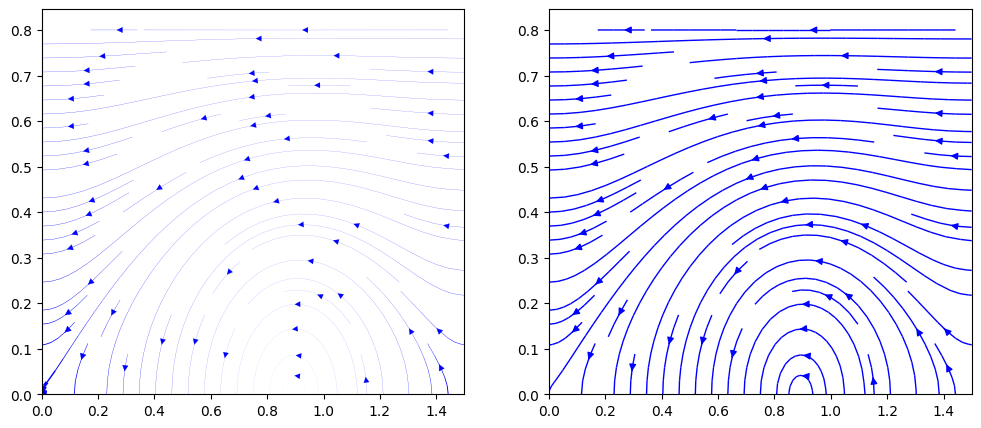

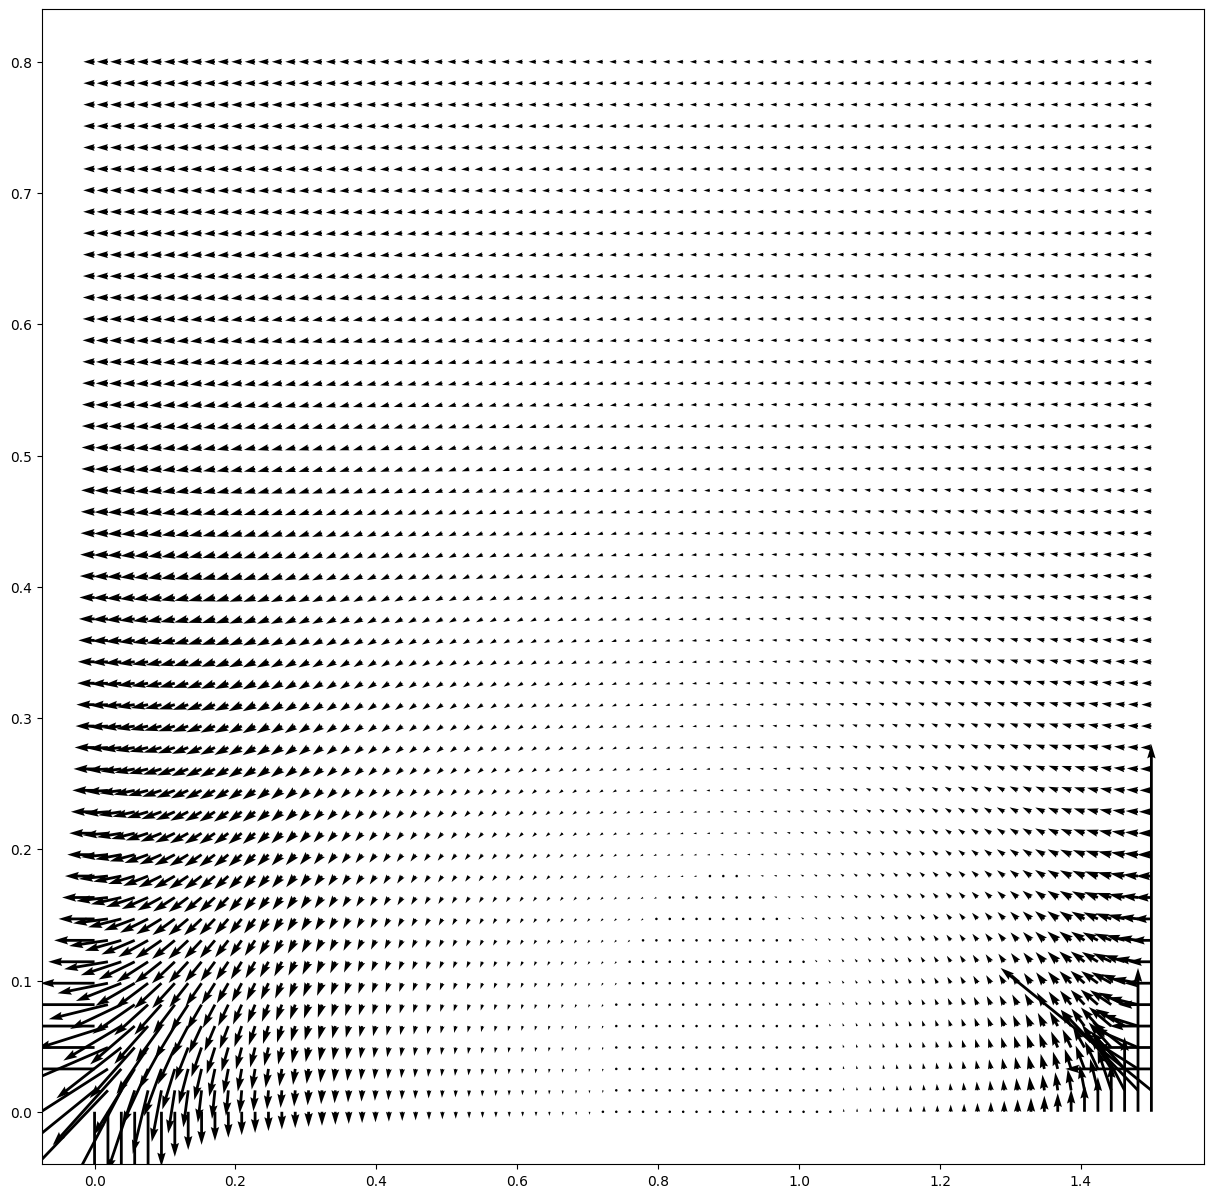

In [2]:
solution.velocityfield("potensial")
solution.plot2D("potensial")
solution.streamplot()
solution.quiver()
phii = solution.solution
a = solution.velocity[:,:,0]
cont = solution.continuity

Iteration:  0 Error is:  0.0 0.0
Iteration:  1000 Error is:  0.010122684333038645 0.013516074755583585
Iteration:  2000 Error is:  0.0017567231831703278 0.0022851766209925906
Iteration:  3000 Error is:  0.0002850936365335066 0.00043356230728219813
Iteration:  4000 Error is:  7.456339150735403e-05 0.00010940048242780165
Max iteration reached. Error is:  2.2200475539246867e-05 3.061495005951542e-05


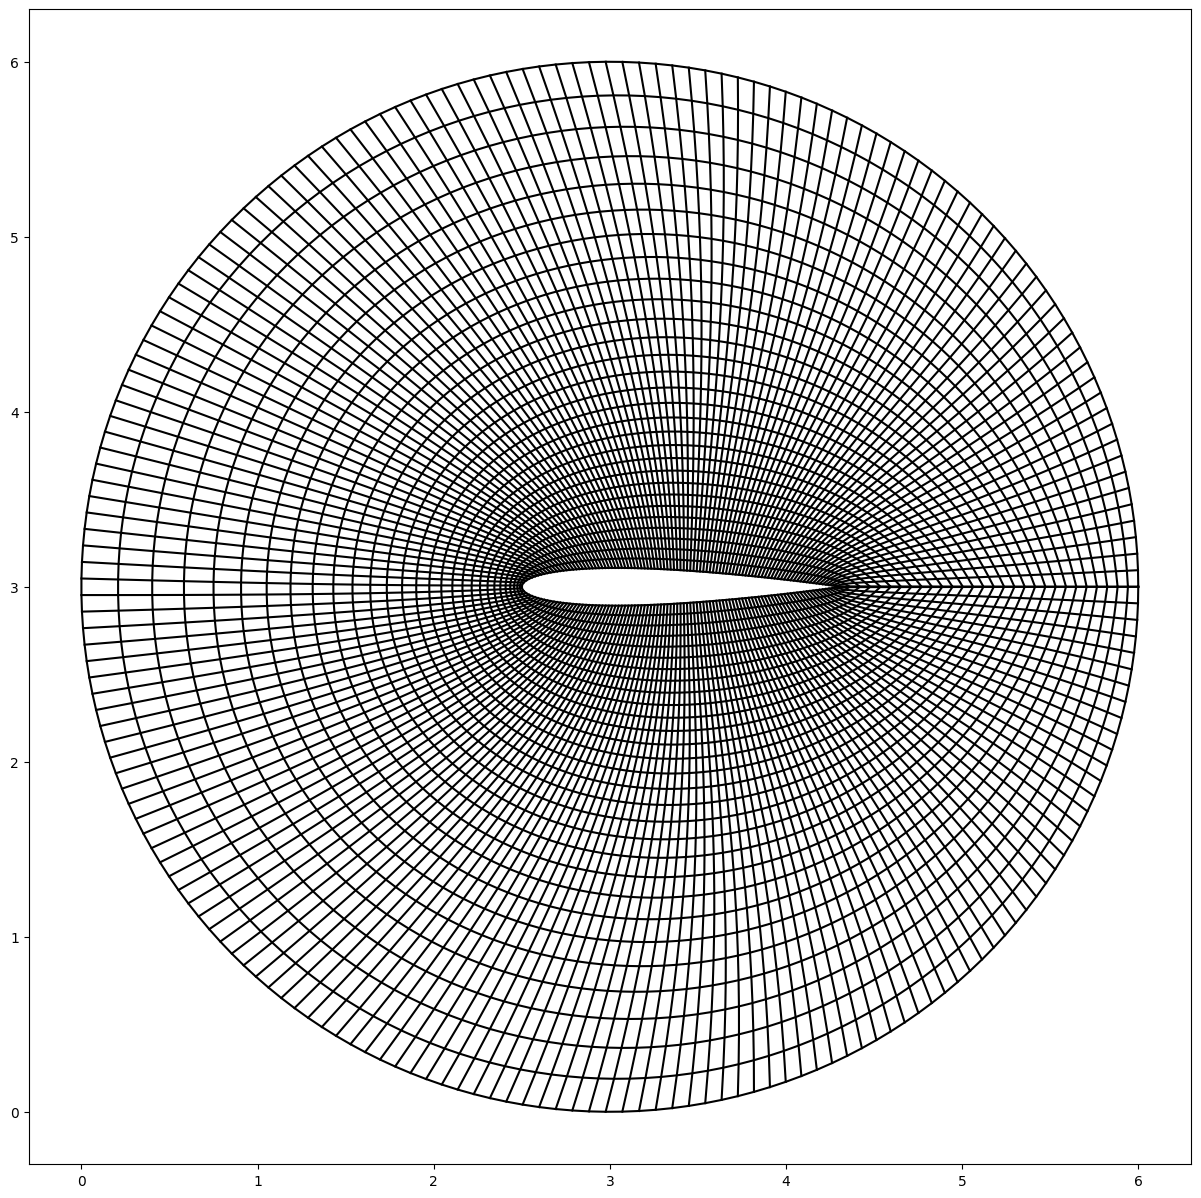

Iteration:  0 Error is:  1.0
Iteration:  1000 Error is:  0.00024280121726799608
Iteration:  2000 Error is:  7.616796391723968e-05
Iteration:  3000 Error is:  2.375156599271344e-05
Iteration:  4000 Error is:  7.359171778631435e-06
Max iteration reached. Error is:  2.2770316648879074e-06


/mnt/c/Users/SARI/NADAS_codes/solvers.py:467: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, self.solution, cmap = 'jet')


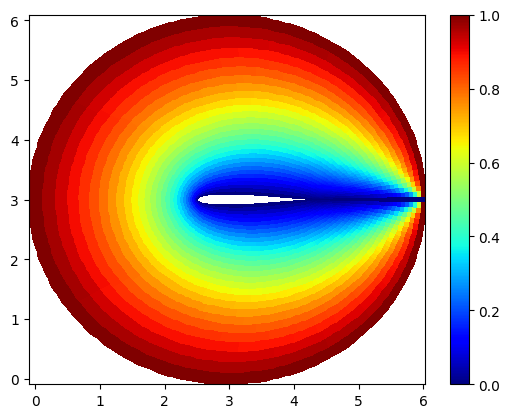

In [1]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from Domain import ElippticMesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map
import scipy as sp
from importtools import import_geometry
from solvers import eliptic_PDE_solver


def circles(x, y, r):
    th = np.linspace(0, 2 * np.pi, 200)
    xunit = r * np.cos(th) + x
    yunit = r * np.sin(th) + y
    circle_list = np.array([xunit, yunit]).T
    return circle_list

naca0012 = import_geometry('naca0012.txt')
naca0012 = closeshape_interpolation(naca0012, 200)

circleee = circles(3, 3, 3)

naca0012[:,:] = naca0012[:,:] * 1.8
naca0012[:,0] += 2.5
naca0012[:,1] += 3

node_numbers = [200, 30]
space_trial = ElippticMesh(node_numbers, naca0012, circleee) 
space_trial.create_elipticmesh()
X = space_trial.X
space_trial.plot_mesh()

BCvalues = {'Out': 1, 'In': 0, 'Cut1': 0, 'Cut2': 0}
stream_naca0012 = eliptic_PDE_solver(space_trial, BCvalues)
stream_naca0012.solver()
stream_naca0012.plot2D()







# block_coordinates = [(0,-0.8),(0,0.8),(3.5,0.8),(3.5,-0.8)]
# node_numbers = [200, 300]
# space_trial = Mesh(block_coordinates, node_numbers) 

# a, b = space_trial.uniform_block_mesh_2D()



# airfoil = object()
# airfoil.airfoil(naca0012, scale=2.3)
# airfoil_map = Map(space_trial)
# airfoil_map.create_object(airfoil)
# airfoil_map.show()

# area_matrix = airfoil_map.area


# BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'N'}
# BCs_values = {'W': 1, 'S': 0, 'E': 0, 'N': 0}

# solution = PDE_2D_Solver(space_trial,BCs)
# solution.solver(BCs_values, "potensial", airfoil_map, 1.5, 0.12, itteration_type="nodebynode")

# solution.velocityfield("potensial")
# solution.plot2D("potensial")
# solution.stream()
# solution.quiver()




In [ ]:
import numpy as np
import pickle as pkl

#save the output data solution.solution to a file. the file name contains the solution type and the number of nodes, the object name solved and the BCs, and the BCs values.
#use parameters to change the file name 

def save_data(solution, solution_type, BCs, BCs_values, object_name, node_numbers):
    
    file_name = solution_type + "_" + str(node_numbers[0]) + "_" + str(node_numbers[1]) + "_" + object_name + "_"
    np.save(file_name, solution)
    print("data saved to file: " + file_name)

#load the data from the file
def load_data(file_name):
    data = np.loadtxt(file_name, delimiter=",")
    print("data loaded from file: " + file_name)
    return data

#save the data to a file
# save_data(solution.solution, "potensial", BCs, BCs_values, "airfoil", node_numbers)
save_data(solution.solution, "potensial", BCs, BCs_values, "airfoil_smalled", node_numbers)

# with open("airfoil.pkl", "wb") as f:
    # pkl.dump(solution, f)






In [ ]:
import pickle as pkl
with open("airfoil.pkl", "rb") as f:
    solution_temp = pkl.load(f)

In [ ]:
solution_temp.velocityfield("potensial")
solution_temp.plot2D("potensial")
solution_temp.stream()
solution_temp.quiver()


In [ ]:
# a = airfoil_map.area